In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

below we are importing dog vs cat dataset from kaggle

In [3]:
#api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls


 dogs-vs-cats.zip   joshi.jpg	  sample_data		 test1.zip   train.zip
'image resized'     kaggle.json   sampleSubmission.csv	 train


In [5]:

from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
!ls


 dogs-vs-cats.zip   joshi.jpg	  sample_data		 test1.zip   train.zip
'image resized'     kaggle.json   sampleSubmission.csv	 train


In [7]:
from zipfile import ZipFile

dataset = "/content/train.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
import os
# counting the number of files in train folder
path,directr,files=next(os.walk('/content/train'))
file_count=len(files)
print("no of files",file_count)

no of files 25000


printing the name of the images

In [9]:
file_name=os.listdir('/content/train/')
print(file_name)

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg', 'dog.6698.jpg', 'cat.5727.jpg', 'cat.6846.jpg', 'dog.486.jpg', 'dog.10724.jpg', 'cat.7566.jpg', 'cat.10200.jpg', 'dog.4066.jpg', 'dog.9343.jpg', 'cat.3997.jpg', 'dog.9354.jpg', 'dog.4416.jpg', 'cat.11766.jpg', 'cat.1670.jpg', 'dog.3935.jpg', 'dog.7026.jpg', 'cat.1507.jpg', 'dog.8613.jpg', 'cat.10814.jpg', 'dog.5392.jpg', 'cat.1582.jpg', 'dog.6179.jpg', 'dog.5085.jpg', 'dog.10973.jpg', 'cat.4108.jpg', 'dog.1150.jpg', 'cat.7092.jpg', 'dog.1083.jpg', 'dog.8447.jpg', 'cat.9303.jpg', 'dog.9520.jpg', 'dog.10554.jpg', 'cat.6272.jpg', 'cat.8338.jpg', 'dog.11604.jpg', 'dog.11813.jpg', 'dog.1047.jpg', 'cat.5457.jpg', 'dog.1924.jpg', 'dog.4666.jpg', 'dog.389.jpg', 'cat.3319.jpg', 'cat.69.jpg', 'cat.5835.jpg', 'dog.234.jpg', 'dog.6137.jpg', 'dog.10999.jpg', 'cat.5323.jpg', 'dog.8379.jpg', 'cat.701.jpg', 'dog.5599.jpg', 'dog.6614.jpg', 'dog.540.jpg', 'dog.2936.jpg', 'dog.625.jpg', 'dog.8862.jpg', 'cat.86.jpg', 'cat.29

importing the dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

displaying the images of dog and cats

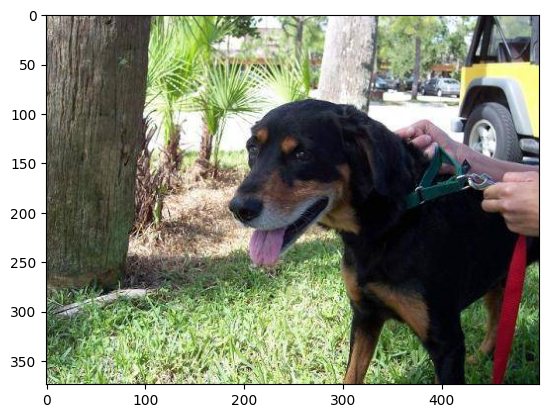

In [11]:
#display dog image
img=mpimg.imread('/content/train/dog.7764.jpg')
imgplot=plt.imshow(img)
plt.show()

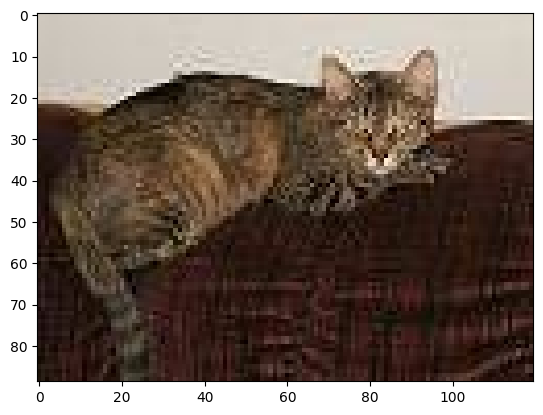

In [12]:
#displaying cat
img=mpimg.imread('/content/train/cat.2096.jpg')
imgplot=plt.imshow(img)
plt.show()

Resizing all the images

In [13]:
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [14]:

original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)


Creating label of resize images

In [15]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(0)

  else:
    labels.append(1)

In [16]:
print(filenames[0:5])
print(len(filenames))

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg']
2000


In [17]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 1]
2000


In [18]:

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1021  979]


converting all the resized images to numpy arrays

In [19]:
import cv2
import glob


In [20]:
image_directory='/content/image resized/'
image_extension=['jpg','png']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e))for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file)for file in files])

numpy array over here

In [21]:
print(dog_cat_images)

[[[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]]


 [[[ 42 179 171]
   [ 47 184 176]
   [ 55 192 184]
   ...
   [110 209 213]
   [107 206 210]
   [124 223 227]]

  [[ 51 188 180]
   [ 55 192 184]
   [ 61 198 190]
   ...
   [117 216 220]
   [108 207 211]
   [116 215 219]]

  [[ 59 196 188]
   [ 62 199 191]
   [ 65 202 194]
   ...
   [114 214 219]
   [103 203 208]
   [102 202

In [22]:
type(dog_cat_images)

numpy.ndarray

In [23]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [24]:
X=dog_cat_images
Y=np.asarray(labels)

In [25]:
print(Y)

[1 0 0 ... 0 0 0]


train test **split**

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600--> training images
400----> test images

In [28]:

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [29]:
print(X_train_scaled)

[[[[0.49411765 0.44705882 0.47058824]
   [0.56862745 0.52156863 0.54509804]
   [0.52156863 0.48235294 0.50588235]
   ...
   [0.38823529 0.33333333 0.34901961]
   [0.48627451 0.43921569 0.4627451 ]
   [0.5254902  0.47843137 0.50196078]]

  [[0.50588235 0.45882353 0.48235294]
   [0.55686275 0.50980392 0.53333333]
   [0.51764706 0.47843137 0.50196078]
   ...
   [0.37647059 0.32156863 0.3372549 ]
   [0.46666667 0.41960784 0.44313725]
   [0.49411765 0.44705882 0.47058824]]

  [[0.51372549 0.46666667 0.49019608]
   [0.52941176 0.48235294 0.50588235]
   [0.49803922 0.45882353 0.48235294]
   ...
   [0.39607843 0.34117647 0.35686275]
   [0.47843137 0.43137255 0.45490196]
   [0.49019608 0.44313725 0.46666667]]

  ...

  [[0.41568627 0.39215686 0.41176471]
   [0.40392157 0.38039216 0.4       ]
   [0.40392157 0.38039216 0.4       ]
   ...
   [0.25882353 0.2745098  0.34901961]
   [0.25490196 0.27843137 0.35294118]
   [0.30980392 0.33333333 0.40784314]]

  [[0.41960784 0.39607843 0.41568627]
   [0.4

**Building the neural network**

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [32]:
num_of_classes=2

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [33]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fix the typo here
    metrics=['acc']
)

In [34]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 0.2052 - acc: 0.9137
Epoch 2/5
50/50 [==============================] - 60s 1s/step - loss: 0.0777 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0620 - acc: 0.9787
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0484 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0400 - acc: 0.9881


In [35]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0569 - acc: 0.9825
Test Loss= 0.0569099485874176
Test Accuracy= 0.9825000166893005


predictive system

path of the image/content/cat.jpg


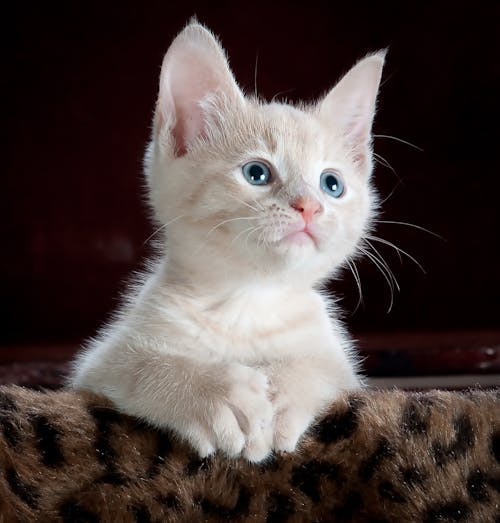

1/1 [==============================] - 1s 1s/step
the image is of cat


In [36]:
input_image_path=input('path of the image')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
  print('the image is of dog')
else:
  print('the image is of cat')

path of the image/content/dog.jpg


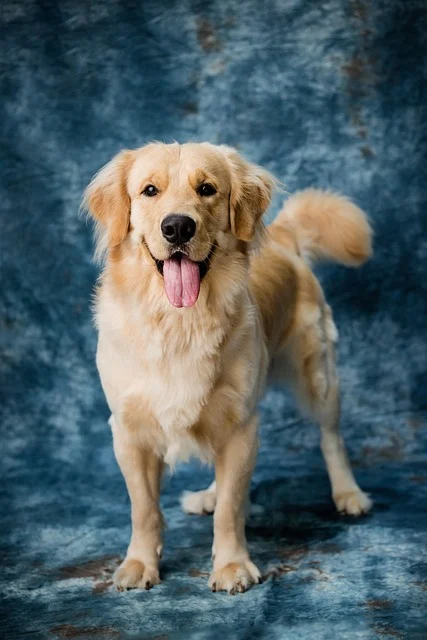

1/1 [==============================] - 0s 95ms/step
the image is of dog


In [37]:
input_image_path=input('path of the image')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
  print('the image is of dog')
else:
  print('the image is of cat')